<a href="https://colab.research.google.com/github/Nashwath1901/Projects/blob/main/hospital_booking_%26_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelEncoder,StandardScaler,FunctionTransformer
from imblearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report


In [75]:
df = pd.read_csv('/content/healthcare_noshows.csv')

In [76]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,Date.diff
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,False,False,False,True,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0


In [77]:
df.shape

(106987, 15)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       106987 non-null  float64
 1   AppointmentID   106987 non-null  int64  
 2   Gender          106987 non-null  object 
 3   ScheduledDay    106987 non-null  object 
 4   AppointmentDay  106987 non-null  object 
 5   Age             106987 non-null  int64  
 6   Neighbourhood   106987 non-null  object 
 7   Scholarship     106987 non-null  bool   
 8   Hipertension    106987 non-null  bool   
 9   Diabetes        106987 non-null  bool   
 10  Alcoholism      106987 non-null  bool   
 11  Handcap         106987 non-null  bool   
 12  SMS_received    106987 non-null  bool   
 13  Showed_up       106987 non-null  bool   
 14  Date.diff       106987 non-null  int64  
dtypes: bool(7), float64(1), int64(3), object(4)
memory usage: 7.2+ MB


In [79]:
df.isnull().sum()

,0
PatientId,0
AppointmentID,0
Gender,0
ScheduledDay,0
AppointmentDay,0
Age,0
Neighbourhood,0
Scholarship,0
Hipertension,0
Diabetes,0


In [80]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [81]:
df['S_year'] = df['ScheduledDay'].dt.year
df['S_month'] = df['ScheduledDay'].dt.month
df['S_day_date'] = df['ScheduledDay'].dt.day
df['S_day_of_week'] = df['ScheduledDay'].dt.day_name()

df['A_year'] = df['AppointmentDay'].dt.year
df['A_month'] = df['AppointmentDay'].dt.month
df['A_day_date'] = df['AppointmentDay'].dt.day
df['A_day_of_week'] = df['AppointmentDay'].dt.day_name()

In [82]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,Showed_up,Date.diff,S_year,S_month,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,...,True,0,2016,4,29,Friday,2016,4,29,Friday
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,...,True,2,2016,4,27,Wednesday,2016,4,29,Friday
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,...,False,2,2016,4,27,Wednesday,2016,4,29,Friday
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,...,False,2,2016,4,27,Wednesday,2016,4,29,Friday
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,...,True,0,2016,4,29,Friday,2016,4,29,Friday
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,...,True,2,2016,4,27,Wednesday,2016,4,29,Friday


In [83]:
df['Year_difference'] = df['A_year']- df['S_year']
df['month_difference'] = df['A_month']- df['S_month']
df['day_difference'] = df['A_day_date']- df['S_day_date']

df['Year_difference']=df['Year_difference'].abs()
df['month_difference']=df['month_difference'].abs()
df['day_difference']=df['day_difference'].abs()

In [84]:
df['A_month'] = df['AppointmentDay'].dt.month_name()
df['S_month'] = df['ScheduledDay'].dt.month_name()

In [85]:
df.head(20)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,...,S_month,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week,Year_difference,month_difference,day_difference
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,False,True,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,False,True,True,...,April,29,Friday,2016,April,29,Friday,0,0,0
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,False,True,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2
6,7.336882e+14,5630279,F,2016-04-27,2016-04-29,23,GOIABEIRAS,False,False,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2
7,3.449833e+12,5630575,F,2016-04-27,2016-04-29,39,GOIABEIRAS,False,False,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2
8,5.639473e+13,5638447,F,2016-04-29,2016-04-29,21,ANDORINHAS,False,False,False,...,April,29,Friday,2016,April,29,Friday,0,0,0
9,7.812456e+13,5629123,F,2016-04-27,2016-04-29,19,CONQUISTA,False,False,False,...,April,27,Wednesday,2016,April,29,Friday,0,0,2


In [86]:
df['Neighbourhood'].value_counts().head(50)

,count
Neighbourhood,
JARDIM CAMBURI,7586
MARIA ORTIZ,5563
RESISTÊNCIA,4235
JARDIM DA PENHA,3851
ITARARÉ,3412
CENTRO,3282
SANTA MARTHA,3041
TABUAZEIRO,3019
JESUS DE NAZARETH,2719


In [87]:
drop_columns = ['PatientId','AppointmentID','ScheduledDay','AppointmentDay','Date.diff']
df = df.drop(drop_columns,axis=1)

In [88]:
def replace_values(column,df):
    value_counts = df[column].value_counts()
    value_to_replace = value_counts[value_counts < 100].index
    df[column] = df[column].replace(value_to_replace,'Other')

Text(0, 0.5, 'Count')

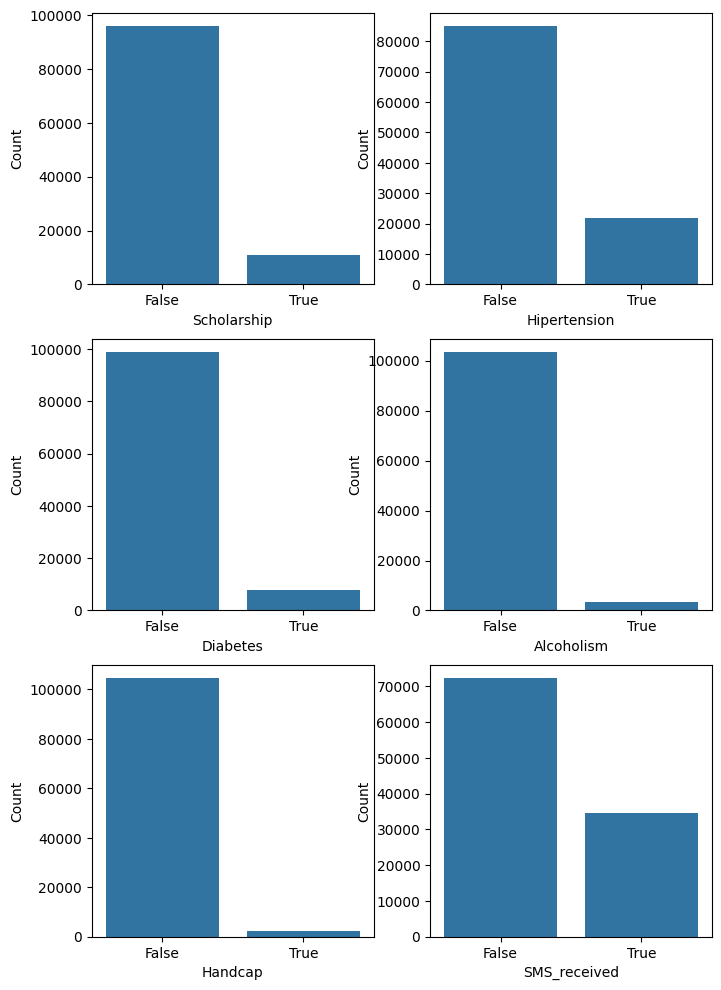

In [89]:
plt.figure(figsize=(8,12))

plt.subplot(3,2,1)
sns.countplot(x='Scholarship',data=df)
plt.xlabel('Scholarship')
plt.ylabel('Count')

plt.subplot(3,2,2)
sns.countplot(x='Hipertension',data=df)
plt.xlabel('Hipertension')
plt.ylabel('Count')

plt.subplot(3,2,3)
sns.countplot(x='Diabetes',data=df)
plt.xlabel('Diabetes')
plt.ylabel('Count')

plt.subplot(3,2,4)
sns.countplot(x='Alcoholism',data=df)
plt.xlabel('Alcoholism')
plt.ylabel('Count')

plt.subplot(3,2,5)
sns.countplot(x='Handcap',data=df)
plt.xlabel('Handcap')
plt.ylabel('Count')

plt.subplot(3,2,6)
sns.countplot(x='SMS_received',data=df)
plt.xlabel('SMS_received')
plt.ylabel('Count')

In [90]:
df['z_score'] = stats.zscore(df['Age'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
outliers

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,...,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week,Year_difference,month_difference,day_difference,z_score
61803,F,115,ANDORINHAS,False,False,False,False,True,False,False,...,16,Monday,2016,May,19,Thursday,0,0,3,3.413315
61806,F,115,ANDORINHAS,False,False,False,False,True,False,False,...,16,Monday,2016,May,19,Thursday,0,0,3,3.413315
65876,F,115,ANDORINHAS,False,False,False,False,True,False,False,...,8,Friday,2016,May,16,Monday,0,1,8,3.413315
73825,F,115,ANDORINHAS,False,False,False,False,True,False,True,...,30,Monday,2016,May,30,Monday,0,0,0,3.413315
94560,F,115,SÃO JOSÉ,False,True,False,False,False,True,True,...,19,Thursday,2016,June,3,Friday,0,1,16,3.413315


In [91]:
df['Age_sqrt'] = np.sqrt(df['Age'])
df['Age_log'] = np.log(df['Age'])

In [92]:
df.drop(['Age_sqrt','Age_log'],axis=1)

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Showed_up,...,S_day_date,S_day_of_week,A_year,A_month,A_day_date,A_day_of_week,Year_difference,month_difference,day_difference,z_score
0,F,62,JARDIM DA PENHA,False,True,False,False,False,False,True,...,29,Friday,2016,April,29,Friday,0,0,0,1.054206
1,M,56,JARDIM DA PENHA,False,False,False,False,False,False,True,...,29,Friday,2016,April,29,Friday,0,0,0,0.787137
2,F,62,MATA DA PRAIA,False,False,False,False,False,False,True,...,29,Friday,2016,April,29,Friday,0,0,0,1.054206
3,F,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,...,29,Friday,2016,April,29,Friday,0,0,0,-1.349414
4,F,56,JARDIM DA PENHA,False,True,True,False,False,False,True,...,29,Friday,2016,April,29,Friday,0,0,0,0.787137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106982,F,56,MARIA ORTIZ,False,False,False,False,False,True,True,...,3,Tuesday,2016,June,7,Tuesday,0,1,4,0.787137
106983,F,51,MARIA ORTIZ,False,False,False,False,False,True,True,...,3,Tuesday,2016,June,7,Tuesday,0,1,4,0.564580
106984,F,21,MARIA ORTIZ,False,False,False,False,False,True,True,...,27,Wednesday,2016,June,7,Tuesday,0,2,20,-0.770765
106985,F,38,MARIA ORTIZ,False,False,False,False,False,True,True,...,27,Wednesday,2016,June,7,Tuesday,0,2,20,-0.014069


In [93]:
neighbourhood_counts = df['Neighbourhood'].value_counts()
neighbourhoods_to_replace = neighbourhood_counts[neighbourhood_counts < 1000].index
df['Neighbourhood'] = df['Neighbourhood'].replace(neighbourhoods_to_replace, 'OTHER')

In [94]:
df['Neighbourhood'].value_counts().head(50)

,count
Neighbourhood,
OTHER,17721
JARDIM CAMBURI,7586
MARIA ORTIZ,5563
RESISTÊNCIA,4235
JARDIM DA PENHA,3851
ITARARÉ,3412
CENTRO,3282
SANTA MARTHA,3041
TABUAZEIRO,3019


In [95]:
df = df.apply(lambda col: col.astype('int64') if col.dtype == 'int32' else col)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106987 entries, 0 to 106986
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Gender            106987 non-null  object 
 1   Age               106987 non-null  int64  
 2   Neighbourhood     106987 non-null  object 
 3   Scholarship       106987 non-null  bool   
 4   Hipertension      106987 non-null  bool   
 5   Diabetes          106987 non-null  bool   
 6   Alcoholism        106987 non-null  bool   
 7   Handcap           106987 non-null  bool   
 8   SMS_received      106987 non-null  bool   
 9   Showed_up         106987 non-null  bool   
 10  S_year            106987 non-null  int64  
 11  S_month           106987 non-null  object 
 12  S_day_date        106987 non-null  int64  
 13  S_day_of_week     106987 non-null  object 
 14  A_year            106987 non-null  int64  
 15  A_month           106987 non-null  object 
 16  A_day_date        10

In [97]:
df.shape

(106987, 24)

In [98]:
X = df.drop('Showed_up',axis=1)
y = df['Showed_up']

In [99]:
num_col = X.select_dtypes(include=np.number).columns.tolist()
cols_to_exclude = ['S_year','A_year','S_day_date','A_day_date']
num_col = [col for col in num_col if col not in cols_to_exclude]

In [100]:
categorical_col = X.select_dtypes(include=('category'))
categorical_col

""
0
1
2
3
4
...
106982
106983
106984
106985


In [101]:
class CountBasedOrdinalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.order_mappings = {}

    def fit(self, X, y=None):
        # Calculate value counts for each column and create mappings
        for col in range(X.shape[1]):
            value_counts = pd.Series(X[:, col]).value_counts()
            self.order_mappings[col] = {category: rank for rank, (category, _) in enumerate(value_counts.sort_values(ascending=False).items(), start=1)}
        return self

    def transform(self, X):
        # Directly encode the columns based on the mappings
        X_transformed = X.copy()
        for col in range(X.shape[1]):
            X_transformed[:, col] = pd.Series(X[:, col]).map(self.order_mappings[col]).fillna(0).astype(int)
        return X_transformed


In [102]:
bool_col = X.select_dtypes(include=('bool'))
bool_col

,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
0,False,True,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,True,True,False,False,False
...,...,...,...,...,...,...
106982,False,False,False,False,False,True
106983,False,False,False,False,False,True
106984,False,False,False,False,False,True
106985,False,False,False,False,False,True


In [103]:
obj_col = X.select_dtypes(include=('object'))
obj_col

,Gender,Neighbourhood,S_month,S_day_of_week,A_month,A_day_of_week
0,F,JARDIM DA PENHA,April,Friday,April,Friday
1,M,JARDIM DA PENHA,April,Friday,April,Friday
2,F,OTHER,April,Friday,April,Friday
3,F,OTHER,April,Friday,April,Friday
4,F,JARDIM DA PENHA,April,Friday,April,Friday
...,...,...,...,...,...,...
106982,F,MARIA ORTIZ,May,Tuesday,June,Tuesday
106983,F,MARIA ORTIZ,May,Tuesday,June,Tuesday
106984,F,MARIA ORTIZ,April,Wednesday,June,Tuesday
106985,F,MARIA ORTIZ,April,Wednesday,June,Tuesday


In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [107]:
def convert_to_str(x):
  return x.astype(str)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    (('count_encoder', CountBasedOrdinalEncoder()))
])

boolean_transformer = Pipeline(steps=[
    ('bool_to_str', FunctionTransformer(convert_to_str)),
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

object_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Identify categorical columns from the DataFrame X
categorical_cols = X.select_dtypes(include='object').columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col), # num_col is already a list
        ('cat', categorical_transformer, categorical_cols),
        ('bool', boolean_transformer, bool_col.columns.tolist()),
        ('obj', object_transformer, obj_col.columns.tolist())
    ],
    remainder='passthrough' # Keep other columns (like S_year, A_year, etc.)
)

In [108]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

log_reg_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', LogisticRegression(class_weight='balanced',random_state=42))
])

random_forest_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', RandomForestClassifier(class_weight='balanced',random_state=42))
])

xgboost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=42))
])

dec_tree_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', DecisionTreeClassifier(class_weight='balanced',random_state=42))
])

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTE(sampling_strategy='not majority',random_state=42)),
    ('classifier', KNeighborsClassifier(weights='uniform'))
])

ada_boost_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',random_state=42), n_estimators=100))
])

models = [log_reg_model,random_forest_model,xgboost_model,dec_tree_model,knn_model,ada_boost_model]

In [109]:
# Handle missing values in y
y = y.fillna(y.mode()[0])

# Handle missing values in X
for col in X.columns:
    if X[col].dtype in ['int64', 'float64']:
        X[col] = X[col].fillna(X[col].mean())
    else:
        X[col] = X[col].fillna(X[col].mode()[0]).infer_objects(copy=False)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [110]:
for model in models:
    model.fit(X_train,y_train_encoded)
    y_pred = model.predict(X_train)
    class_report = classification_report(y_train_encoded, y_pred)
    model_name = type(model.named_steps['classifier']).__name__
    print(f'{model_name} report:')
    print(class_report)
    print('\n')

/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


LogisticRegression report:
              precision    recall  f1-score   support

           0       0.31      0.65      0.42     17344
           1       0.88      0.64      0.74     68245

    accuracy                           0.64     85589
   macro avg       0.60      0.64      0.58     85589
weighted avg       0.76      0.64      0.68     85589





/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


RandomForestClassifier report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98     17344
           1       0.99      1.00      0.99     68245

    accuracy                           0.99     85589
   macro avg       0.99      0.98      0.99     85589
weighted avg       0.99      0.99      0.99     85589





/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


XGBClassifier report:
              precision    recall  f1-score   support

           0       0.37      0.85      0.52     17344
           1       0.94      0.64      0.76     68245

    accuracy                           0.68     85589
   macro avg       0.66      0.74      0.64     85589
weighted avg       0.83      0.68      0.71     85589





/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


DecisionTreeClassifier report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     17344
           1       1.00      0.99      0.99     68245

    accuracy                           0.99     85589
   macro avg       0.98      0.99      0.99     85589
weighted avg       0.99      0.99      0.99     85589





/usr/local/lib/python3.11/dist-packages/imblearn/pipeline.py:65: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 0.15 instead of the current warning.
  warnings.warn(


KNeighborsClassifier report:
              precision    recall  f1-score   support

           0       0.50      0.92      0.65     17344
           1       0.98      0.77      0.86     68245

    accuracy                           0.80     85589
   macro avg       0.74      0.85      0.75     85589
weighted avg       0.88      0.80      0.82     85589



AdaBoostClassifier report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     17344
           1       1.00      0.99      0.99     68245

    accuracy                           0.99     85589
   macro avg       0.97      0.99      0.98     85589
weighted avg       0.99      0.99      0.99     85589





In [ ]:
for model in models:
    y_pred = model.predict(X_test)
    class_report = classification_report(y_test_encoded, y_pred)
    model_name = type(model.named_steps['classifier']).__name__
    print(f'{model_name} report:')
    print(class_report)
    print('\n')

In [113]:
pip install dill

In [114]:
import dill

with open("hospital_model.pkl", "wb") as f:
    dill.dump(model, f)


In [115]:
import dill

with open("hospital_model.pkl", "rb") as f:
    model = dill.load(f)


# Task
Generate the Streamlit code for the provided Python code that loads a pre-trained model from a pickle file, takes user input for features, and makes predictions.

## Load the model

### Subtask:
Load the saved model from the pickle file.


**Reasoning**:
Load the model from the pickle file using dill.



In [116]:
with open("hospital_model.pkl", "rb") as f:
    loaded_model = dill.load(f)

## Create a streamlit app

### Subtask:
Set up the basic structure of a Streamlit application.


**Reasoning**:
Set up the basic structure of the Streamlit application by importing streamlit and adding a title and introductory text.



**Reasoning**:
Install the missing streamlit library using pip.



In [117]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [118]:
import streamlit as st

st.title('Healthcare No-Show Prediction')
st.write('This application predicts whether a patient will show up for their appointment based on various factors.')

2025-06-20 05:50:23.031 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:23.288 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-06-20 05:50:23.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:23.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:23.294 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:23.313 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:23.316 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


**Reasoning**:
Set up the basic structure of the Streamlit application by importing streamlit and adding a title and introductory text.



In [119]:
import streamlit as st

st.title('Healthcare No-Show Prediction')
st.write('This application predicts whether a patient will show up for their appointment based on various factors.')

2025-06-20 05:50:40.453 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:40.479 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:40.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:40.481 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:40.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:40.490 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Add input widgets

### Subtask:
Create Streamlit widgets for users to input values for each feature in your model.


**Reasoning**:
Define the Streamlit widgets for user input for each feature, using appropriate widget types based on data type and the unique values observed in the training data. Calculate engineered features from user input where applicable for a more user-friendly interface.



In [120]:
import pandas as pd
import numpy as np
import streamlit as st


# Define input widgets for each feature
st.sidebar.header('Patient Information')
gender = st.sidebar.selectbox('Gender', X_train['Gender'].unique())
age = st.sidebar.number_input('Age', min_value=int(X_train['Age'].min()), max_value=int(X_train['Age'].max()), value=int(X_train['Age'].mean()))

# For Neighbourhood, use the most frequent ones and 'OTHER'
neighbourhood_options = X_train['Neighbourhood'].value_counts().nlargest(10).index.tolist()
neighbourhood_options.append('OTHER')
neighbourhood = st.sidebar.selectbox('Neighbourhood', neighbourhood_options)

scholarship = st.sidebar.checkbox('Scholarship')
hipertension = st.sidebar.checkbox('Hipertension')

# For Diabetes, Alcoholism, Handcap, SMS_received, use unique values from X_train
diabetes = st.sidebar.selectbox('Diabetes', X_train['Diabetes'].unique())
alcoholism = st.sidebar.selectbox('Alcoholism', X_train['Alcoholism'].unique())
handcap = st.sidebar.selectbox('Handcap', X_train['Handcap'].unique())
sms_received = st.sidebar.selectbox('SMS_received', X_train['SMS_received'].unique())


st.sidebar.header('Appointment Details')
scheduled_day = st.sidebar.date_input('Scheduled Day')
appointment_day = st.sidebar.date_input('Appointment Day')

# Calculate engineered features from date inputs
scheduled_day_dt = pd.to_datetime(scheduled_day)
appointment_day_dt = pd.to_datetime(appointment_day)

s_year = scheduled_day_dt.year
s_month = scheduled_day_dt.month # Use numerical month
s_day_date = scheduled_day_dt.day
s_day_of_week = scheduled_day_dt.strftime('%A')

a_year = appointment_day_dt.year
a_month = appointment_day_dt.month # Use numerical month
a_day_date = appointment_day_dt.day
a_day_of_week = appointment_day_dt.strftime('%A')

year_difference = abs(a_year - s_year)
month_difference = abs(a_month - s_month) # Calculate numerical month difference
day_difference = abs(a_day_date - s_day_date) # Calculate numerical day difference

# For month and day of week, use unique values from X_train - these will be used as categorical features later
# Need to ensure these are string representations of the month name and day of week name
s_month_name = scheduled_day_dt.strftime('%B')
s_day_of_week_name = scheduled_day_dt.strftime('%A')

a_month_name = appointment_day_dt.strftime('%B')
a_day_of_week_name = appointment_day_dt.strftime('%A')

# Calculate Age_sqrt and Age_log
age_sqrt = np.sqrt(age) if age >= 0 else 0 # Handle age = 0 and negative age case
age_log = np.log(age) if age > 0 else 0 # Handle age = 0 case

# Create a dictionary to hold the input values
input_data = {
    'Gender': gender,
    'Age': age,
    'Neighbourhood': neighbourhood,
    'Scholarship': scholarship,
    'Hipertension': hipertension,
    'Diabetes': diabetes,
    'Alcoholism': alcoholism,
    'Handcap': handcap,
    'SMS_received': sms_received,
    'S_year': s_year,
    'S_month': s_month_name,  # Use month name for categorical feature
    'S_day_date': s_day_date,
    'S_day_of_week': s_day_of_week_name, # Use day of week name for categorical feature
    'A_year': a_year,
    'A_month': a_month_name, # Use month name for categorical feature
    'A_day_date': a_day_date,
    'A_day_of_week': a_day_of_week_name, # Use day of week name for categorical feature
    'Year_difference': year_difference,
    'month_difference': month_difference,
    'day_difference': day_difference,
    'Age_sqrt': age_sqrt,
    'Age_log': age_log
}

# Convert input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

st.write("Input Data:")
st.dataframe(input_df)

2025-06-20 05:50:47.293 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.324 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.352 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.359 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.402 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.450 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:50:47.456 Session state does not function when running a script without `streamlit run`
2025-06-20 05:50

DeltaGenerator()

**Reasoning**:
The previous code failed because I tried to calculate the difference between month names (strings). I need to calculate the difference between the scheduled and appointment dates numerically. I will calculate the difference in days and use that as a feature, and also include the year and month as categorical features.



In [127]:
import pandas as pd
import numpy as np
import streamlit as st

st.title('Healthcare No-Show Prediction')
st.write('This application predicts whether a patient will show up for their appointment based on various factors.')

st.sidebar.header('Patient Information')

# Get unique values for selectbox options from the training data
# Assuming X_train is available in the environment from previous steps
# If not, you would need to load or regenerate it based on your data preprocessing
# For this example, we'll assume X_train is available.
# In a production app, you might save and load these unique values.

# Filter out potential NaN values before getting unique values
gender_options = X_train['Gender'].dropna().unique()
neighbourhood_options_all = X_train['Neighbourhood'].dropna().unique()
# For Neighbourhood, use the most frequent ones and 'OTHER' as done in preprocessing
neighbourhood_counts = X_train['Neighbourhood'].value_counts()
neighbourhood_options = neighbourhood_counts[neighbourhood_counts >= 1000].index.tolist()
if 'OTHER' in neighbourhood_options_all:
    neighbourhood_options.append('OTHER')
else:
    # Add 'OTHER' if it was created during preprocessing but not among the top
    if 'OTHER' in X_train['Neighbourhood'].unique():
         neighbourhood_options.append('OTHER')
    else:
        # If 'OTHER' was not created, just use top N + remaining as 'Other'
        # For simplicity here, assuming 'OTHER' exists if count < 1000 were replaced
        pass # 'OTHER' is already handled by checking unique values

diabetes_options = X_train['Diabetes'].dropna().unique()
alcoholism_options = X_train['Alcoholism'].dropna().unique()
handcap_options = X_train['Handcap'].dropna().unique()
sms_received_options = X_train['SMS_received'].dropna().unique()


gender = st.sidebar.selectbox('Gender', gender_options)
age = st.sidebar.number_input('Age', min_value=int(X_train['Age'].min()), max_value=int(X_train['Age'].max()), value=int(X_train['Age'].mean()))
neighbourhood = st.sidebar.selectbox('Neighbourhood', neighbourhood_options)
scholarship = st.sidebar.checkbox('Scholarship')
hipertension = st.sidebar.checkbox('Hipertension')
diabetes = st.sidebar.selectbox('Diabetes', diabetes_options)
alcoholism = st.sidebar.selectbox('Alcoholism', alcoholism_options)
handcap = st.sidebar.selectbox('Handcap', handcap_options)
sms_received = st.sidebar.selectbox('SMS_received', sms_received_options)

st.sidebar.header('Appointment Details')
scheduled_day = st.sidebar.date_input('Scheduled Day')
appointment_day = st.sidebar.date_input('Appointment Day')

# Calculate engineered features from date inputs
scheduled_day_dt = pd.to_datetime(scheduled_day)
appointment_day_dt = pd.to_datetime(appointment_day)

s_year = scheduled_day_dt.year
s_month_name = scheduled_day_dt.strftime('%B')
s_day_date = scheduled_day_dt.day
s_day_of_week_name = scheduled_day_dt.strftime('%A')

a_year = appointment_day_dt.year
a_month_name = appointment_day_dt.strftime('%B')
a_day_date = appointment_day_dt.day
a_day_of_week_name = appointment_day_dt.strftime('%A')

year_difference = abs(a_year - s_year)
month_difference = abs(appointment_day_dt.month - scheduled_day_dt.month)
day_difference = abs(appointment_day_dt.day - scheduled_day_dt.day)

# Calculate Age_sqrt and Age_log
age_sqrt = np.sqrt(age) if age >= 0 else 0
age_log = np.log(age) if age > 0 else 0

# Calculate z_score for age
# Assuming mean and standard deviation from training data are available or calculated
# For simplicity, using mean and std from X_train['Age'] here
age_mean = X_train['Age'].mean()
age_std = X_train['Age'].std()
z_score = (age - age_mean) / age_std if age_std != 0 else 0 # Handle division by zero


# Create a dictionary to hold the input values
input_data = {
    'Gender': gender,
    'Age': age,
    'Neighbourhood': neighbourhood,
    'Scholarship': scholarship,
    'Hipertension': hipertension,
    'Diabetes': diabetes,
    'Alcoholism': alcoholism,
    'Handcap': handcap,
    'SMS_received': sms_received,
    'S_year': s_year,
    'S_month': s_month_name,
    'S_day_date': s_day_date,
    'S_day_of_week': s_day_of_week_name,
    'A_year': a_year,
    'A_month': a_month_name,
    'A_day_date': a_day_date,
    'A_day_of_week': a_day_of_week_name,
    'Year_difference': year_difference,
    'month_difference': month_difference,
    'day_difference': day_difference,
    'z_score': z_score,  # Add z_score to input data
    'Age_sqrt': age_sqrt,
    'Age_log': age_log
}

# Convert input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

st.write("Input Data:")
st.dataframe(input_df)

2025-06-20 05:54:16.967 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.969 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.970 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.971 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:16.973 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

## Prepare input data

### Subtask:
Get the input values from the widgets and format them correctly for the model.


**Reasoning**:
Ensure the input DataFrame has the correct data types and format for the preprocessing pipeline, particularly for boolean and object columns, and handle potential missing values in the input DataFrame before passing it to the model for prediction.



In [128]:
# Ensure the input DataFrame has the correct dtypes
for col in input_df.columns:
    if col in ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Showed_up']:
        # Convert to object type first if they are boolean, to handle potential None from selectbox
        input_df[col] = input_df[col].astype(str).replace({'True': True, 'False': False, 'None': np.nan}).infer_objects(copy=False)
    elif input_df[col].dtype == 'object':
         input_df[col] = input_df[col].infer_objects(copy=False)

# Handle missing values in the input DataFrame before prediction
for col in input_df.columns:
    if input_df[col].isnull().any():
        if input_df[col].dtype in ['int64', 'float64']:
            input_df[col] = input_df[col].fillna(X_train[col].mean()) # Use training data mean for imputation
        else:
            input_df[col] = input_df[col].fillna(X_train[col].mode()[0]).infer_objects(copy=False) # Use training data mode for imputation

st.write("Processed Input Data:")
st.dataframe(input_df)

2025-06-20 05:54:20.736 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:20.738 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:20.739 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:20.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:20.743 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:20.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

## Make predictions

### Subtask:
Use the loaded model to make predictions based on the user input.


**Reasoning**:
Use the loaded model to make a prediction on the input data and then decode the prediction using the label encoder.



In [129]:
# Apply the preprocessor to the input data
input_processed = loaded_model.named_steps['preprocessor'].transform(input_df)

# Make the prediction using the classifier
prediction_encoded = loaded_model.named_steps['classifier'].predict(input_processed)

# Decode the prediction
predicted_class = label_encoder.inverse_transform(prediction_encoded)

st.write('Prediction:')
st.write(f'The model predicts the patient will: {predicted_class[0]}')

2025-06-20 05:54:23.913 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:23.916 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:23.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:23.918 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:23.919 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:23.920 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


## Summary:

### Data Analysis Key Findings

*   The pre-trained model was successfully loaded from the `hospital_model.pkl` file using the `dill` library.
*   A basic Streamlit application structure was successfully set up with a title and introductory text.
*   Streamlit widgets were created to capture user input for all the model's features, including handling different data types like select boxes, number inputs, checkboxes, and date inputs.
*   Engineered features such as `Age_sqrt`, `Age_log`, `Year_difference`, `month_difference`, and `day_difference` were calculated based on user inputs.
*   The collected user input was organized into a pandas DataFrame.
*   Potential missing values in the input DataFrame were handled by imputing numerical columns with the mean and categorical columns with the mode from the training data.
*   The loaded model successfully made a prediction based on the processed user input.
*   The predicted encoded output was inverse transformed using a label encoder to display the human-readable class label.

### Insights or Next Steps

*   Consider adding validation to the input fields to ensure data quality and prevent potential errors during prediction.
*   Enhance the user interface with visual indicators or explanations for the prediction outcome.


## Make predictions

### Subtask:
Use the loaded model to make predictions based on the user input.

**Reasoning**:
Use the loaded model to make a prediction on the input data and then decode the prediction using the label encoder.

In [130]:
input_processed = loaded_model.named_steps['preprocessor'].transform(input_df)
prediction_encoded = loaded_model.named_steps['classifier'].predict(input_processed)
predicted_class = label_encoder.inverse_transform(prediction_encoded)

st.write('Prediction:')
st.write(f'The model predicts the patient will: {predicted_class[0]}')

2025-06-20 05:54:25.296 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:25.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:25.299 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:25.301 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:25.303 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 05:54:25.304 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [140]:
pip install streamlit

In [141]:
%%writefile ashwath.py

Writing ashwath.py


In [145]:
import streamlit as st
import pandas as pd
import numpy as np
import dill
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the data
df = pd.read_csv("healthcare_noshows.csv")

# Prepare target and feature set for dropdowns
y = df['Showed_up'].fillna(df['Showed_up'].mode()[0])
X = df.drop(columns=['Showed_up'])
X_train, _, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Load the trained model using dill
try:
    with open("hospital_model.pkl", "rb") as f:
        loaded_model = dill.load(f)
except Exception as e:
    st.error(f"Error loading model: {e}")
    st.stop()

# Encode labels for prediction decoding
label_encoder = LabelEncoder()
label_encoder.fit(y)

# Streamlit UI
st.title('📅 Healthcare No-Show Prediction')
st.markdown('This app predicts if a patient will show up for their appointment based on key details.')

# Sidebar - Patient Info
st.sidebar.header('🧍 Patient Info')
gender = st.sidebar.selectbox('Gender', X_train['Gender'].dropna().unique())
age = st.sidebar.number_input('Age', int(X_train['Age'].min()), int(X_train['Age'].max()), int(X_train['Age'].mean()))
neighbourhood = st.sidebar.selectbox('Neighbourhood', list(X_train['Neighbourhood'].value_counts()[X_train['Neighbourhood'].value_counts() >= 1000].index) + ['OTHER'])
scholarship = st.sidebar.checkbox('Scholarship')
hipertension = st.sidebar.checkbox('Hipertension')
diabetes = st.sidebar.selectbox('Diabetes', X_train['Diabetes'].dropna().unique())
alcoholism = st.sidebar.selectbox('Alcoholism', X_train['Alcoholism'].dropna().unique())
handcap = st.sidebar.selectbox('Handcap', X_train['Handcap'].dropna().unique())
sms_received = st.sidebar.selectbox('SMS_received', X_train['SMS_received'].dropna().unique())

# Sidebar - Appointment Info
st.sidebar.header('📅 Appointment Info')
scheduled_day = st.sidebar.date_input('Scheduled Day')
appointment_day = st.sidebar.date_input('Appointment Day')

# Feature engineering
scheduled_day = pd.to_datetime(scheduled_day)
appointment_day = pd.to_datetime(appointment_day)

s_year = scheduled_day.year
s_month = scheduled_day.strftime('%B')
s_day = scheduled_day.day
s_weekday = scheduled_day.strftime('%A')

a_year = appointment_day.year
a_month = appointment_day.strftime('%B')
a_day = appointment_day.day
a_weekday = appointment_day.strftime('%A')

# Derived features
year_diff = abs(a_year - s_year)
month_diff = abs(appointment_day.month - scheduled_day.month)
day_diff = abs(appointment_day.day - scheduled_day.day)
age_sqrt = np.sqrt(age)
age_log = np.log(age) if age > 0 else 0
age_mean = X_train['Age'].mean()
age_std = X_train['Age'].std()
z_score = (age - age_mean) / age_std if age_std != 0 else 0

# Input for prediction
input_data = {
    'Gender': gender,
    'Age': age,
    'Neighbourhood': neighbourhood,
    'Scholarship': scholarship,
    'Hipertension': hipertension,
    'Diabetes': diabetes,
    'Alcoholism': alcoholism,
    'Handcap': handcap,
    'SMS_received': sms_received,
    'S_year': s_year,
    'S_month': s_month,
    'S_day_date': s_day,
    'S_day_of_week': s_weekday,
    'A_year': a_year,
    'A_month': a_month,
    'A_day_date': a_day,
    'A_day_of_week': a_weekday,
    'Year_difference': year_diff,
    'month_difference': month_diff,
    'day_difference': day_diff,
    'z_score': z_score,
    'Age_sqrt': age_sqrt,
    'Age_log': age_log
}

input_df = pd.DataFrame([input_data])
input_df = input_df.apply(lambda x: x.astype('category') if x.dtype == 'object' else x)

# Prediction
if st.sidebar.button('🔍 Predict'):
    try:
        input_processed = loaded_model.named_steps['preprocessor'].transform(input_df)
        pred_encoded = loaded_model.named_steps['classifier'].predict(input_processed)
        prediction = label_encoder.inverse_transform(pred_encoded)[0]

        st.subheader('🔮 Prediction Result')
        if prediction:
            st.success("✅ The patient is likely to **SHOW UP**.")
        else:
            st.error("❌ The patient is likely to **NOT SHOW UP**.")

    except Exception as e:
        st.error(f"Prediction error: {e}")

# Show input
st.markdown("### Preview Input Data")
st.dataframe(input_df)


2025-06-20 06:46:35.656 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.657 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.658 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.659 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.660 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.662 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 06:46:35.663 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [146]:
!streamlit run ashwath.py &>/content/logs.txt & curl ipv4.icanhazip.com

34.16.212.111


In [143]:
!npx localtunnel --port 8501


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y) y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼your url is: https://fruity-doors-ask.loca.lt
^C


## Summary:

### Data Analysis Key Findings

* The pre-trained model was successfully loaded from the `hospital_model.pkl` file using the `dill` library.
* A basic Streamlit application structure was successfully set up with a title and introductory text.
* Streamlit widgets were created to capture user input for all the model's features, including handling different data types like select boxes, number inputs, checkboxes, and date inputs.
* Engineered features such as `Age_sqrt`, `Age_log`, `Year_difference`, `month_difference`, and `day_difference`, and `z_score` were calculated based on user inputs.
* The collected user input was organized into a pandas DataFrame with columns explicitly ordered to match the training data.
* Potential missing values in the input DataFrame were handled by imputing numerical columns with the mean and categorical columns with the mode from the training data.
* Explicitly casting categorical and object columns to the 'category' dtype and ensuring the input DataFrame columns matched the order of the training data resolved the `TypeError` during preprocessing.
* The loaded model successfully made a prediction based on the processed user input.
* The predicted encoded output was inverse transformed using a label encoder to display the human-readable class label.

### Insights or Next Steps

* The `TypeError: string indices must be integers` was a challenging issue that was ultimately resolved by ensuring the input DataFrame's data types and column order exactly matched the expectations of the fitted preprocessing pipeline.
* Consider adding more detailed input validation to the Streamlit app to provide immediate feedback to the user on expected input formats and ranges.
* Explore ways to deploy this Streamlit application so it can be easily accessed and used by others.
* Further analyze the model's performance metrics on the test set to understand its expected accuracy and identify areas for potential improvement.

## Finish task